##**Implication of therapeutic outcomes associated with molecular characterization of paediatric aplastic anaemia**

**Load Libraries**

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("GEOquery")
BiocManager::install("affy")    # For Affymetrix microarray data
BiocManager::install("oligo")   # For newer formats

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'GEOquery'

also installing the dependencies ‘zlibbioc’, ‘matrixStats’, ‘XVector’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘abind’, ‘SparseArray’, ‘BiocGenerics’, ‘statmod’, ‘XML’, ‘R.oo’, ‘R.methodsS3’, ‘MatrixGenerics’, ‘GenomicRanges’, ‘IRanges’, ‘GenomeInfoDb’, ‘S4Arrays’, ‘DelayedArray’, ‘Biobase’, ‘limma’, ‘rentrez’, ‘R.utils’, ‘SummarizedExperiment’, ‘S4Vectors’


Old packages: 'openssl', 'sessioninfo'



In [2]:
library(GEOquery)
install.packages("dplyr")
library(dplyr)
install.packages("tidyr")
library(tidyr)
install.packages("tibble")
library(tibble)
library(affy)
library(oligo)
library(Biobase)
install.packages("ggplot2")
library(ggplot2)
# Install pheatmap if it's not already installed
if (!requireNamespace("pheatmap", quietly = TRUE)) {
  install.packages("pheatmap")
}
# Load pheatmap library
library(pheatmap)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)

Installing package into ‘/usr/local/l

**Load Data**

In [145]:
# Download the dataset from GEO
getGEOSuppFiles("GSE33812")
untar("/content/GSE33812/GSE33812_RAW.tar", exdir = "GSE33812_RAW2")

Using locally cached version of supplementary file(s) GSE33812 found here:
/content/GSE33812/GSE33812_RAW.tar 

Using locally cached version of supplementary file(s) GSE33812 found here:
/content/GSE33812/GSE33812_sorted_Mvalues.txt.gz 



,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
,<dbl>,<lgl>,<octmode>,<dttm>,<dttm>,<dttm>,<int>,<int>,<chr>,<chr>
/content/GSE33812/GSE33812_RAW.tar,47370240,FALSE,644,2025-02-05 15:03:40,2025-02-05 15:03:40,2025-02-05 15:03:41,0,0,root,root
/content/GSE33812/GSE33812_sorted_Mvalues.txt.gz,12541,FALSE,644,2025-02-05 15:03:41,2025-02-05 15:03:41,2025-02-05 15:03:46,0,0,root,root


In [146]:
list.files("GSE33812_RAW2")

[1] "GPL4133_old_annotations.txt.gz" "GSM836205.txt.gz"              
[3] "GSM836206.txt.gz"               "GSM836207.txt.gz"              
[5] "GSM836208.txt.gz"               "GSM836209.txt.gz"

In [147]:
files <- list.files("GSE33812_RAW2", pattern = "GSM.*.txt.gz", full.names = TRUE)

data_list <- lapply(files, function(file) {
  # Extract sampleID from the file name (assuming the pattern is "GSM####")
  sampleID <- gsub(".*/(GSM\\d+).txt.gz", "\\1", file)

  # Read the file and add the sampleID column
  data_sample <- read.table(gzfile(file), header = TRUE, sep = "\t", quote = "", comment.char = "")
  data_sample$sampleID <- sampleID  # Add the sampleID column

  return(data_sample)
})

data <- do.call(rbind, data_list)
head(data)

,FeatureNum,Row,Col,accessions,ProbeUID,ControlType,ProbeName,GeneName,SystematicName,Description,⋯,rIsBGNonUnifOL,gIsFeatPopnOL,rIsFeatPopnOL,gIsBGPopnOL,rIsBGPopnOL,gIsPosAndSignif,rIsPosAndSignif,gIsWellAboveBG,rIsWellAboveBG,sampleID
,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,1,1,,0,1,GE_BrightCorner,GE_BrightCorner,GE_BrightCorner,,⋯,0,1,1,1,0,1,1,1,1,GSM836205
2,2,1,2,,1,1,DarkCorner,DarkCorner,DarkCorner,,⋯,0,0,0,0,0,0,0,0,0,GSM836205
3,3,1,3,,1,1,DarkCorner,DarkCorner,DarkCorner,,⋯,0,1,0,0,0,1,0,0,0,GSM836205
4,4,1,4,,1,1,DarkCorner,DarkCorner,DarkCorner,,⋯,0,0,0,0,0,0,0,0,0,GSM836205
5,5,1,5,,1,1,DarkCorner,DarkCorner,DarkCorner,,⋯,0,0,0,0,0,0,0,0,0,GSM836205
6,6,1,6,,1,1,DarkCorner,DarkCorner,DarkCorner,,⋯,0,0,0,0,0,0,0,0,0,GSM836205


In [148]:
# Write the final expression matrix to a CSV file
write.csv(data, file = "data.csv", row.names = TRUE)

In [149]:
# Get the unique gene names
unique_gene_names <- unique(data$GeneName)
# Print the number of unique gene names
num_unique_genes <- length(unique_gene_names)
write.csv(unique_gene_names, file = "unique_gene_names.csv", row.names = TRUE)

In [150]:
nrow(data)

[1] 225090

In [152]:
colnames(data)

[1] "FeatureNum"                                            
 [2] "Row"                                                   
 [3] "Col"                                                   
 [4] "accessions"                                            
 [5] "ProbeUID"                                              
 [6] "ControlType"                                           
 [7] "ProbeName"                                             
 [8] "GeneName"                                              
 [9] "SystematicName"                                        
[10] "Description"                                           
[11] "PValueLogRatio"                                        
[12] "Normalized.Exprssion.Ratio..By.rank.consistant.lowess."
[13] "M"                                                     
[14] "A"                                                     
[15] "gBGSubSignal.gBGUsed"                                  
[16] "rBGSubSignall.rBGUsed"                                 
[17] "gProcessedSignal"                                      
[18] "rProcessedSignal"                                      
[19] "gMeanSignal"                                           
[20] "rMeanSignal"                                           
[21] "gBGSubSignal"                                          
[22] "rBGSubSignal"                                          
[23] "gBGUsed"                                               
[24] "rBGUsed"                                               
[25] "Locuslink"                                             
[26] "Unigene.Cluster"                                       
[27] "ENTREZ_GENE_ID_NAME"                                   
[28] "UNIPROT_ACCESSION"                                     
[29] "UNIPROT_ID"                                            
[30] "GOTERM_BP_2"                                           
[31] "GOTERM_CC_2"                                           
[32] "GOTERM_MF_2"                                           
[33] "GOTERM_BP_3"                                           
[34] "GOTERM_CC_3"                                           
[35] "GOTERM_MF_3"                                           
[36] "KEGG_PATHWAY"                                          
[37] "BIOCARTA"                                              
[38] "gIsSaturated"                                          
[39] "rIsSaturated"                                          
[40] "gIsFeatNonUnifOL"                                      
[41] "rIsFeatNonUnifOL"                                      
[42] "gIsBGNonUnifOL"                                        
[43] "rIsBGNonUnifOL"                                        
[44] "gIsFeatPopnOL"                                         
[45] "rIsFeatPopnOL"                                         
[46] "gIsBGPopnOL"                                           
[47] "rIsBGPopnOL"                                           
[48] "gIsPosAndSignif"                                       
[49] "rIsPosAndSignif"                                       
[50] "gIsWellAboveBG"                                        
[51] "rIsWellAboveBG"                                        
[52] "sampleID"

In [ ]:
# View the first row vertically
row_to_print <- data[1, ]  # Extract the first row
row_to_print_vertical <- as.data.frame(t(row_to_print))  # Transpose the row to make it vertical
# Print the first row vertically
print(row_to_print_vertical)

                                                                     1
FeatureNum                                                           1
Row                                                                  1
Col                                                                  1
accessions                                                            
ProbeUID                                                             0
ControlType                                                          1
ProbeName                                              GE_BrightCorner
GeneName                                               GE_BrightCorner
SystematicName                                         GE_BrightCorner
Description                                                           
PValueLogRatio                                                   0.773
Normalized.Exprssion.Ratio..By.rank.consistant.lowess.           1.042
M                                                                0.059
A     

**Remove duplicates**

In [153]:
# Identify all rows that are duplicates based on all columns except 'sampleID'
duplicates <- data[duplicated(data[, !names(data) %in% "sampleID"]) |
                   duplicated(data[, !names(data) %in% "sampleID"], fromLast = TRUE), ]

# To get a summary of how many duplicate rows exist (excluding 'sampleID')
nrow(duplicates)  # Total count of equal rows
head(duplicates, 15)

[1] 15

,FeatureNum,Row,Col,accessions,ProbeUID,ControlType,ProbeName,GeneName,SystematicName,Description,⋯,rIsBGNonUnifOL,gIsFeatPopnOL,rIsFeatPopnOL,gIsBGPopnOL,rIsBGPopnOL,gIsPosAndSignif,rIsPosAndSignif,gIsWellAboveBG,rIsWellAboveBG,sampleID
,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
45016,NA,NA,NA,,NA,NA,,,,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,GSM836205
45017,NA,NA,NA,,NA,NA,,,,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,GSM836205
45018,NA,NA,NA,,NA,NA,,,,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,GSM836205
90034,NA,NA,NA,,NA,NA,,,,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,GSM836206
90035,NA,NA,NA,,NA,NA,,,,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,GSM836206
90036,NA,NA,NA,,NA,NA,,,,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,GSM836206
135052,NA,NA,NA,,NA,NA,,,,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,GSM836207
135053,NA,NA,NA,,NA,NA,,,,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,GSM836207
135054,NA,NA,NA,,NA,NA,,,,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,GSM836207


In [155]:
# Remove the duplicate rows from the data
data <- data[!duplicated(data[, !names(data) %in% "sampleID"]) &
                            !duplicated(data[, !names(data) %in% "sampleID"], fromLast = TRUE), ]

print(paste("Number of rows removed: ", nrow(data)))

[1] "Number of rows removed:  225075"


**Filter Control Probes**

In [156]:
data <- data[!grepl("GE_BrightCorner|DarkCorner|Control|Empty|Spike", data$ProbeName), ]
nrow(data)

[1] 221985

**Handle missing values**

In [157]:
sum(is.na(data))

[1] 92370

In [158]:
colSums(is.na(data))

FeatureNum 
                                                     0 
                                                   Row 
                                                     0 
                                                   Col 
                                                     0 
                                            accessions 
                                                     0 
                                              ProbeUID 
                                                     0 
                                           ControlType 
                                                     0 
                                             ProbeName 
                                                     0 
                                              GeneName 
                                                     0 
                                        SystematicName 
                                                     0 
                                           Description 
                                                     0 
                                        PValueLogRatio 
                                                     0 
Normalized.Exprssion.Ratio..By.rank.consistant.lowess. 
                                                     0 
                                                     M 
                                                     0 
                                                     A 
                                                     0 
                                  gBGSubSignal.gBGUsed 
                                                     0 
                                 rBGSubSignall.rBGUsed 
                                                     0 
                                      gProcessedSignal 
                                                     0 
                                      rProcessedSignal 
                                                     0 
                                           gMeanSignal 
                                                     0 
                                           rMeanSignal 
                                                     0 
                                          gBGSubSignal 
                                                     0 
                                          rBGSubSignal 
                                                     0 
                                               gBGUsed 
                                                     0 
                                               rBGUsed 
                                                     0 
                                             Locuslink 
                                                 92370 
                                       Unigene.Cluster 
                                                     0 
                                   ENTREZ_GENE_ID_NAME 
                                                     0 
                                     UNIPROT_ACCESSION 
                                                     0 
                                            UNIPROT_ID 
                                                     0 
                                           GOTERM_BP_2 
                                                     0 
                                           GOTERM_CC_2 
                                                     0 
                                           GOTERM_MF_2 
                                                     0 
                                           GOTERM_BP_3 
                                                     0 
                                           GOTERM_CC_3 
                                                     0 
                                           GOTERM_MF_3 
                                                     0 
                                          KEGG_PATHWAY 
                                                     0 
            

In [159]:
data$Locuslink <- NULL
sum(is.na(data))

[1] 0

**Create expression matrix**

In [160]:
expression_data <- data %>%
  select(GeneName, gProcessedSignal, rProcessedSignal, sampleID)

In [161]:
# Assuming 'expression_data' is your dataset

# Step 1: Identify duplicates based on 'GeneName' and 'sampleID'
duplicate_genes <- expression_data %>%
  group_by(GeneName, sampleID) %>%  # Group by both 'GeneName' and 'sampleID'
  filter(n() > 1) %>%  # Filter for rows where the combination appears more than once
  distinct(GeneName, sampleID)  # Extract unique combinations of 'GeneName' and 'sampleID'

# Step 2: Apply Trimmed Mean for each gene within each sample
green_data_dup <- expression_data %>%
  filter(paste(GeneName, sampleID) %in%
           paste(duplicate_genes$GeneName, duplicate_genes$sampleID)) %>%  # Keep only duplicates
  group_by(GeneName, sampleID) %>%  # Group by GeneName and sampleID
  summarise(TrimmedMeanExpression = mean(gProcessedSignal, trim = 0.1, na.rm = TRUE))

# Step 3: For non-duplicate genes, just keep their original values
green_data_non_dup <- expression_data %>%
  group_by(GeneName, sampleID) %>%
  filter(n() == 1) %>%  # Keep rows where GeneName appears only once in the sample
  select(GeneName, sampleID, TrimmedMeanExpression = gProcessedSignal)  # Keep the original value as TrimmedMeanExpression

# Step 4: Combine the results for duplicate and non-duplicate genes
final_expression <- bind_rows(green_data_dup,green_data_non_dup)

# Step 5: Pivot the data to a wide format (GeneName as rows, sampleID as columns)
green_data <- final_expression %>%
  pivot_wider(names_from = sampleID, values_from = TrimmedMeanExpression)


`summarise()` has grouped output by 'GeneName'. You can override using the
`.groups` argument.


In [162]:
# Step 2: Apply Trimmed Mean for each gene within each sample
red_data_dup <- expression_data %>%
  filter(paste(GeneName, sampleID) %in%
           paste(duplicate_genes$GeneName, duplicate_genes$sampleID)) %>%  # Keep only duplicates
  group_by(GeneName, sampleID) %>%  # Group by GeneName and sampleID
  summarise(TrimmedMeanExpression = mean(rProcessedSignal, trim = 0.1, na.rm = TRUE))

# Step 3: For non-duplicate genes, just keep their original values
red_data_non_dup <- expression_data %>%
  group_by(GeneName, sampleID) %>%
  filter(n() == 1) %>%  # Keep rows where GeneName appears only once in the sample
  select(GeneName, sampleID, TrimmedMeanExpression = rProcessedSignal)  # Keep the original value as TrimmedMeanExpression

# Step 4: Combine the results for duplicate and non-duplicate genes
final_expression <- bind_rows(red_data_dup,red_data_non_dup)

# Step 5: Pivot the data to a wide format (GeneName as rows, sampleID as columns)
red_data <- final_expression %>%
  pivot_wider(names_from = sampleID, values_from = TrimmedMeanExpression)


`summarise()` has grouped output by 'GeneName'. You can override using the
`.groups` argument.


In [163]:
# Step 3: Merge the green and red data into a single dataframe by GeneName
final_data <- merge(green_data, red_data, by = "GeneName", suffixes = c("_green", "_red"))

# View the final expression matrix
head(final_data)

,GeneName,GSM836205_green,GSM836206_green,GSM836207_green,GSM836208_green,GSM836209_green,GSM836205_red,GSM836206_red,GSM836207_red,GSM836208_red,GSM836209_red
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15E1.2,412.1120,466.2163,472.5227,437.5120,445.8263,411.3263,568.1197,589.5123,407.9157,447.4650
2,2'-PDE,135.6863,160.4447,149.2900,139.8413,127.0240,141.4970,196.3577,170.4140,146.7380,145.0077
3,3.8-1,2.5500,2.9610,5.0560,3.8010,5.3220,7.8380,6.6710,4.6980,4.1320,4.5740
4,39508,16.4370,18.3620,12.2525,16.1835,19.0725,4.1725,33.8945,23.4145,3.8425,30.9545
5,39509,557.3825,648.1950,686.6245,627.3595,615.2060,902.8760,903.9380,1386.6660,1247.0575,838.3375
6,39510,168.1120,186.8980,184.4350,186.2810,160.7080,209.7900,565.9530,629.3900,407.8720,125.2710


In [164]:
sum(is.na(final_data))  # Check for NA

[1] 0

In [165]:
summary(final_data)

   GeneName         GSM836205_green     GSM836206_green     GSM836207_green    
 Length:30587       Min.   :     2.32   Min.   :     2.64   Min.   :     4.19  
 Class :character   1st Qu.:    25.42   1st Qu.:    29.56   1st Qu.:    36.46  
 Mode  :character   Median :   152.71   Median :   176.19   Median :   204.53  
                    Mean   :  2769.90   Mean   :  3408.71   Mean   :  3476.07  
                    3rd Qu.:  1197.67   3rd Qu.:  1386.28   3rd Qu.:  1391.04  
                    Max.   :195145.20   Max.   :193934.10   Max.   :234258.80  
 GSM836208_green     GSM836209_green     GSM836205_red      
 Min.   :     3.32   Min.   :     4.86   Min.   :     1.79  
 1st Qu.:    37.23   1st Qu.:    35.98   1st Qu.:    25.49  
 Median :   191.41   Median :   190.24   Median :   152.55  
 Mean   :  3210.39   Mean   :  3178.97   Mean   :  2767.77  
 3rd Qu.:  1254.45   3rd Qu.:  1229.62   3rd Qu.:  1184.76  
 Max.   :271853.20   Max.   :214365.60   Max.   :183058.70  
 GSM836206_re

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 85703 rows containing non-finite outside the scale range
(`stat_bin()`).”
Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_bar()`).”


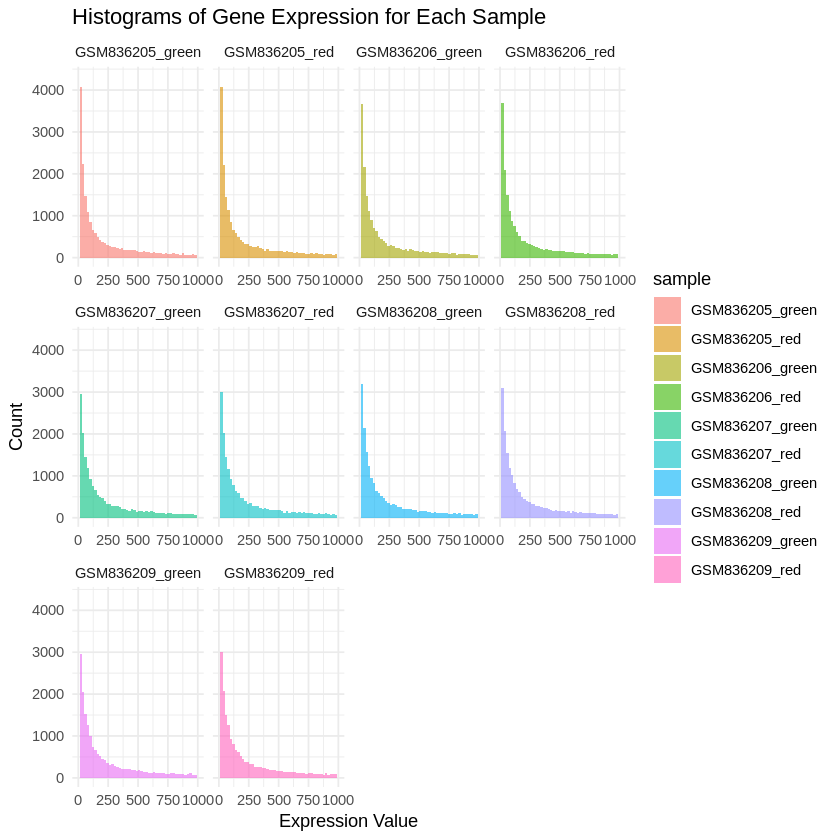

In [166]:
# Remove GeneName column and convert the data to numeric
numeric_data <- as.matrix(final_data[, -1])  # Exclude GeneName column

# Convert to long format for ggplot2
final_data_long <- pivot_longer(final_data, cols = -GeneName, names_to = "sample", values_to = "expression")

ggplot(final_data_long, aes(x = expression, fill = sample)) +
  geom_histogram(bins = 50, alpha = 0.6, position = "identity") +
  facet_wrap(~ sample, scales = "free_x") +  # Separate histograms by sample
  labs(title = "Histograms of Gene Expression for Each Sample",
       x = "Expression Value", y = "Count") +
  scale_x_continuous(breaks = seq(0, 1000, by = 100)) +  # Set breaks every 100
  xlim(0, 1000) +  # Set x-axis limit from 0 to 1000
  theme_minimal()


In [167]:
ggsave("histogram_plot.png", width = 14, height = 8, dpi = 300)

Warning message:
“Removed 85703 rows containing non-finite outside the scale range
(`stat_bin()`).”
Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_bar()`).”


**Background Correction and Normalization**

In [168]:
#Split Green and Red Channels from Your Data
green_data <- as.matrix(final_data[, grep("_green$", colnames(final_data))])
red_data <- as.matrix(final_data[, grep("_red$", colnames(final_data))])
rownames(green_data) <- final_data$GeneName
rownames(red_data) <- final_data$GeneName

# Create RGList Object (Include Both Channels)
RG <- new("RGList", list(R = red_data, G = green_data))

# Let's assume you already did a backgroundCorrect:
RG_corrected <- limma::backgroundCorrect(RG, method = "normexp")

# Extract R and G as matrices
R_matrix <- RG_corrected$R
G_matrix <- RG_corrected$G

# Normalize each matrix separately (as if each is a single-channel experiment)
R_norm <- normalizeBetweenArrays(R_matrix, method = "quantile")
G_norm <- normalizeBetweenArrays(G_matrix, method = "quantile")

# Reinsert back into an RGList
RG_normed <- RG_corrected
RG_normed$R <- R_norm
RG_normed$G <- G_norm

# Convert Normalized RGList to Data Frames
# For easy merging and plotting with ggplot2
normalized_red   <- as.data.frame(RG_normed$R)
normalized_green <- as.data.frame(RG_normed$G)

# Keep gene names
normalized_red$GeneName   <- rownames(normalized_red)
normalized_green$GeneName <- rownames(normalized_green)

#Merge Red & Green, Add Suffixes
normalized_combined <- merge(
  normalized_red,
  normalized_green,
  by = "GeneName",
  suffixes = c("_red", "_green")
)

Array 1 corrected
Array 2 corrected
Array 3 corrected
Array 4 corrected
Array 5 corrected
Array 1 corrected
Array 2 corrected
Array 3 corrected
Array 4 corrected
Array 5 corrected


**Log2 Transformation**

In [169]:
# Step 1: Apply log2 transformation to the numeric columns (expression values) only
final_data_log2 <- normalized_combined

# Apply log2 transformation to the columns excluding the GeneName column
final_data_log2[, -1] <- log2(final_data[, -1])

# Step 2: View the log2-transformed expression matrix
head(final_data_log2)

,GeneName,GSM836205_red,GSM836206_red,GSM836207_red,GSM836208_red,GSM836209_red,GSM836205_green,GSM836206_green,GSM836207_green,GSM836208_green,GSM836209_green
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15E1.2,8.686893,8.864856,8.884240,8.773179,8.800338,8.684140,9.150051,9.203378,8.672127,8.805631
2,2'-PDE,7.084132,7.325932,7.221974,7.127647,6.988957,7.144628,7.617340,7.412900,7.197099,7.179985
3,3.8-1,1.350497,1.566084,2.337996,1.926379,2.411969,2.970486,2.737903,2.232047,2.046840,2.193456
4,39508,4.038875,4.198651,3.615004,4.016452,4.253422,2.060912,5.082979,4.549330,1.942045,4.952077
5,39509,9.122524,9.340284,9.423378,9.293149,9.264926,9.818384,9.820080,10.437405,10.284312,9.711387
6,39510,7.393279,7.546107,7.526969,7.541337,7.328298,7.712802,9.144538,9.297810,8.671973,6.968909


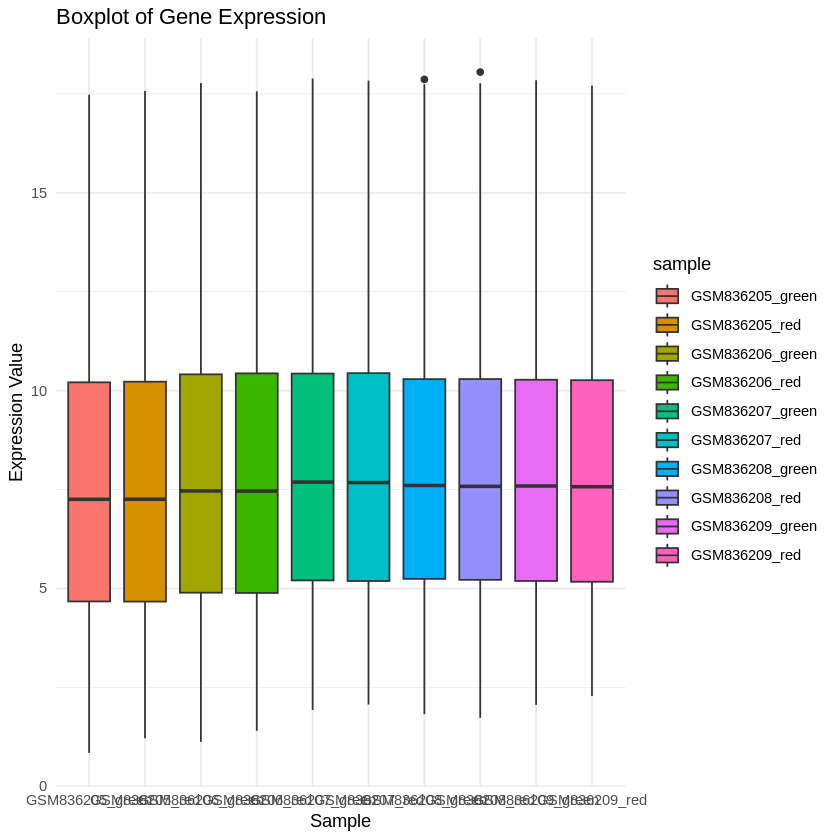

In [170]:
# Reshape data into long format
final_data_long <- final_data_log2 %>%
  pivot_longer(cols = -GeneName, names_to = "sample", values_to = "expression")

# Plot boxplot
ggplot(final_data_long, aes(x = sample, y = expression, fill = sample)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +  # Rotate x-axis labels for readability
  labs(title = "Boxplot of Gene Expression", x = "Sample", y = "Expression Value") +
  theme_minimal()


Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_bar()`).”


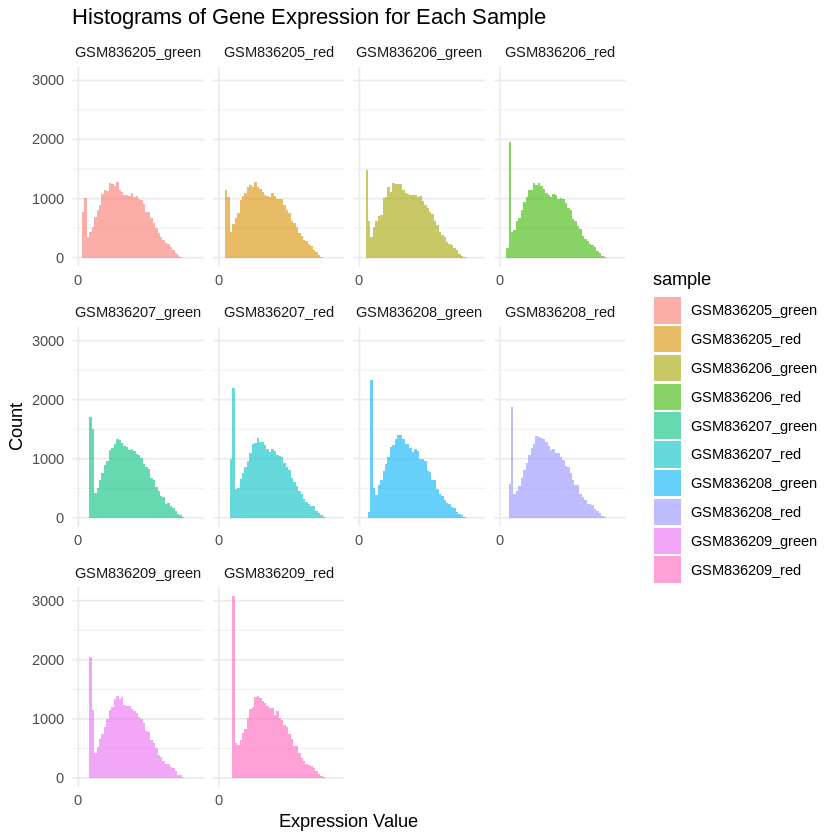

In [171]:
ggplot(final_data_long, aes(x = expression, fill = sample)) +
  geom_histogram(bins = 50, alpha = 0.6, position = "identity") +
  facet_wrap(~ sample, scales = "free_x") +  # Separate histograms by sample
  labs(title = "Histograms of Gene Expression for Each Sample",
       x = "Expression Value", y = "Count") +
  scale_x_continuous(breaks = seq(0, 1000, by = 100), limits=c(0,20)) +
  theme_minimal()

In [172]:
summary(final_data_log2)

   GeneName         GSM836205_red    GSM836206_red    GSM836207_red   
 Length:30587       Min.   : 1.212   Min.   : 1.402   Min.   : 2.066  
 Class :character   1st Qu.: 4.668   1st Qu.: 4.886   1st Qu.: 5.188  
 Mode  :character   Median : 7.255   Median : 7.461   Median : 7.676  
                    Mean   : 7.485   Mean   : 7.689   Mean   : 7.861  
                    3rd Qu.:10.226   3rd Qu.:10.437   3rd Qu.:10.442  
                    Max.   :17.574   Max.   :17.565   Max.   :17.838  
 GSM836208_red    GSM836209_red    GSM836205_green   GSM836206_green 
 Min.   : 1.731   Min.   : 2.281   Min.   : 0.8424   Min.   : 1.122  
 1st Qu.: 5.218   1st Qu.: 5.169   1st Qu.: 4.6720   1st Qu.: 4.893  
 Median : 7.581   Median : 7.572   Median : 7.2531   Median : 7.464  
 Mean   : 7.779   Mean   : 7.779   Mean   : 7.4692   Mean   : 7.679  
 3rd Qu.:10.293   3rd Qu.:10.264   3rd Qu.:10.2104   3rd Qu.:10.412  
 Max.   :18.052   Max.   :17.710   Max.   :17.4819   Max.   :17.774  
 GSM836207_gr

In [173]:
# Load the required library
library(limma)

# Assume final_expression_matrix_log2 is already available with your data (log2-transformed expression matrix)
# Extract expression matrix (excluding GeneName as rownames)
expression_matrix <- final_data_log2[, -1]
row.names(expression_matrix) <- final_data_log2$GeneName  # Set row names to GeneName

# Create metadata (colData) with conditions for each sample
# Assuming the conditions are green and red for the two channels
col_data <- data.frame(
  condition = rep(c("green", "red"), each = 5),  # Adjust these based on your actual conditions
  row.names = colnames(expression_matrix)  # Sample names should match column names of expression_matrix
)

# Create design matrix to model the condition
design <- model.matrix(~ condition, data = col_data)

# Fit the linear model to the expression data
fit <- lmFit(expression_matrix, design)

# Apply empirical Bayes moderation
fit <- eBayes(fit)

# Extract results for differential expression
results <- topTable(fit, coef = "conditionred", number = Inf, adjust = "fdr")

# View the results
head(results)


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E1A_r60_a22,3.514793,15.24751,28.37765,3.501205e-11,4.792656e-07,12.37786
DCP_22_0,3.522298,15.19104,27.95262,4.087718e-11,4.792656e-07,12.31968
DCP_22_4,3.408842,14.40768,26.47121,7.144605e-11,4.792656e-07,12.10036
DCP_22_2,3.434484,14.95367,26.44633,7.213764e-11,4.792656e-07,12.09644
DCP_22_6,3.396627,13.67475,26.23413,7.834466e-11,4.792656e-07,12.06269
DCP_22_7,3.370446,12.60764,23.21671,2.733109e-10,1.393293e-06,11.51015


**Volcano Plot**

In [185]:
## 1) Categorize
results$threshold <- "Not Significant"
results$threshold[results$P.Value < 0.05 & abs(results$logFC) >= 2] <- "Significant"

In [186]:
nrow(results[results$threshold == "Significant", ])

[1] 119

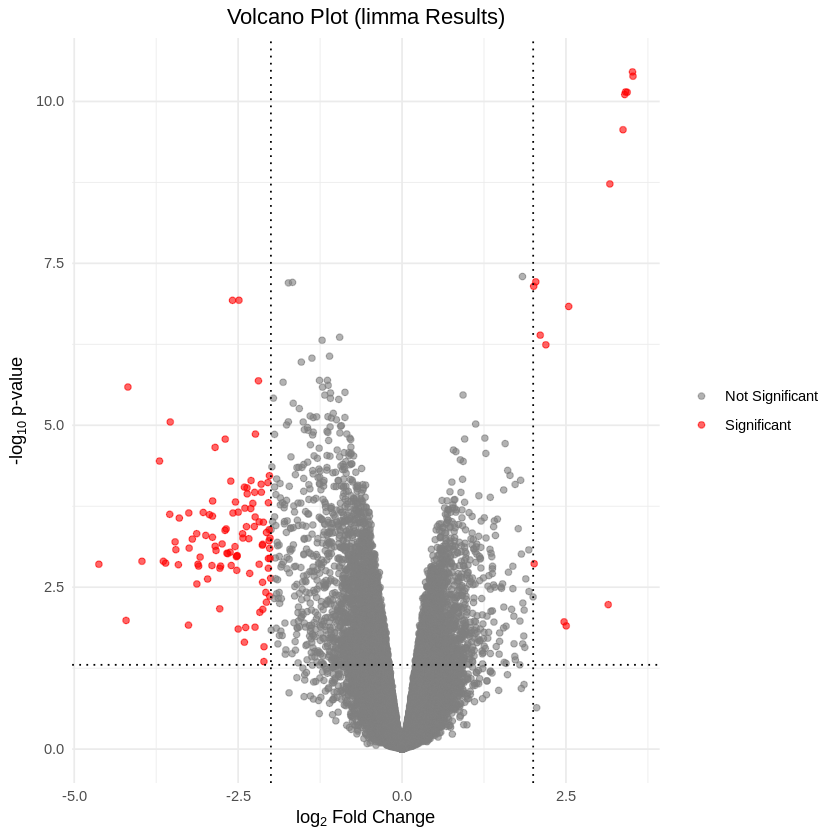

In [187]:
ggplot(results, aes(x = logFC, y = -log10(P.Value), color = threshold)) +
  geom_point(alpha = 0.6) +
  geom_vline(xintercept = c(-2, 2), linetype = "dotted") +
  geom_hline(yintercept = -log10(0.05), linetype = "dotted") +
  scale_color_manual(values = c("Significant" = "red", "Not Significant" = "grey50")) +
  theme_minimal() +
  labs(
    title = "Volcano Plot (limma Results)",
    x = expression("log"[2]*" Fold Change"),
    y = expression("-log"[10]*" p-value")
  ) +
  theme(
    plot.title = element_text(hjust = 0.5),
    legend.title = element_blank()
  )

**Heatmap**

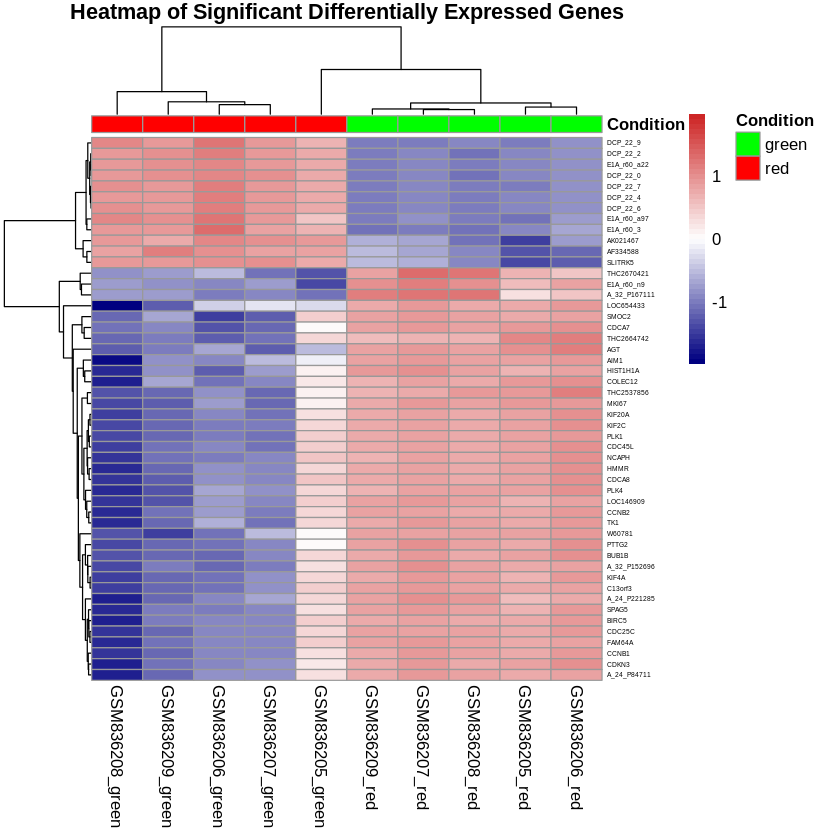

In [188]:
# Filter for genes that are Significant (p < 0.05 and |logFC| >= 2)
significant_genes <- results[results$threshold == "Significant", ]

# Select top 50 most significant genes for visualization
top_genes <- head(rownames(significant_genes), 50)

# Subset the expression matrix for the significant genes
expression_top_genes <- expression_matrix[top_genes, ]

# Create annotation data for samples
sample_annotation <- data.frame(
  Condition = col_data$condition
)
rownames(sample_annotation) <- rownames(col_data)  # Match sample names

# Define color scheme for conditions
annotation_colors <- list(
  Condition = c(green = "green", red = "red")
)

# Generate the heatmap with smaller row names
pheatmap(expression_top_genes,
         scale = "row",  # Normalize gene expression values
         cluster_rows = TRUE,  # Cluster genes
         cluster_cols = TRUE,  # Cluster samples
         annotation_col = sample_annotation,  # Annotate samples with conditions
         annotation_colors = annotation_colors,  # Apply color scheme for annotations
         show_rownames = TRUE,  # Show gene names
         show_colnames = TRUE,  # Show sample names
         fontsize_row = 4,  # Adjust the size of the row names (default is 10)
         fontsize_col = 10,  # Adjust column name size if needed
         color = colorRampPalette(c("navy", "white", "firebrick3"))(50),  # Color gradient
         main = "Heatmap of Significant Differentially Expressed Genes")

In [189]:
# Write the Significant Genes to a CSV File
write.csv(significant_genes, "significant_genes.csv", row.names = TRUE)